# Data collection

Since other projects don't have a public dataset and they give you just the processed data as features of the ML model, I decided to build a dataset by myself. The dataset is in the `dataset/` folder and it's split into two subfolders:
* `dataset/men/` for male voices;
* `dataset/women/` for women voices.

In [1]:
import os 

dataset_dir = 'dataset'
men_dir = os.path.join(dataset_dir, 'men')
women_dir = os.path.join(dataset_dir, 'women')

Before going into details, let's import some modules:

In [3]:
import sounddevice as sd
import numpy as np
import uuid
import matplotlib.pyplot as plt

## [Model assumptions](#model-assumptions)
Each sample is composed by a one-second recording of someone talking. I decided to have a one-second window because it's sufficiently long to be labelled/classified by a human but short enough to be analyzed without worrying too much about noise.

We assume that the bandwidth is less than 4khz ([1], [2]) and therefore the sample rate is set to 8 kHz (see the [Sampling Theorem](https://en.wikipedia.org/wiki/Nyquist%E2%80%93Shannon_sampling_theorem)).

1. https://en.wikipedia.org/wiki/Digital_Signal_0
2. https://en.wikipedia.org/wiki/G.711

In [5]:
audio_duration = 1.0
sd.default.samplerate = 8000
sd.default.channels = 1
sd.default.dtype = 'float32'

time = np.linspace(0, audio_duration, int(audio_duration * sd.default.samplerate))

Recordings have to be done in a controlled environment, in order to keep the SNR as small as possible. The only noise allowed is assumed as Gaussian noise. Also, the audio recorded can't be empty for the vast majority of the time. No overlapping voices are allowed.

## Recording

In [38]:
voice = sd.rec(int(audio_duration * sd.default.samplerate), blocking='True')
fvoice = scipy.signal.medfilt(voice.flatten()) # Filtering the noise
print('Recorded.')

Recorded.


Before saving it, listen to it to make sure the recording meet the [requirements](#model-assumptions):

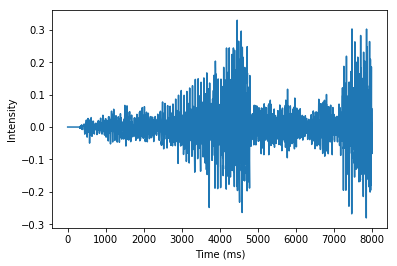

In [39]:
plt.plot(fvoice)
plt.xlabel('Time (ms)')
plt.ylabel('Intensity')
plt.show()

sd.play(fvoice)

In [32]:
def askGender():
    """
        :return: returns the folder path based on the input
    """
    gender = str(input('Is it a man or a woman?'))
    if gender.lower() == 'man':
        return men_dir
    elif gender.lower() == 'woman':
        return women_dir
    else:
        print('You can choose only between "man" and "woman".')
        return askGender()

filename = os.path.join(askGender(), str(uuid.uuid4()))
np.save(filename, fvoice)
print(filename, 'saved.')

Is it a man or a woman?man
dataset\men\ab8d93a0-cf51-46ec-951d-3f4b36e67b5b saved.


## License
<a rel="license" href="http://creativecommons.org/licenses/by/4.0/">
    <img alt="Creative Commons Licence" style="border-width:0; float:left; margin-right: 10px" src="https://i.creativecommons.org/l/by/4.0/80x15.png" />
</a>
This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by/4.0/">Creative Commons Attribution 4.0 International License</a>.